the M87 "conversion constant" for this camera is:

$\Delta \Omega\!\times\!10^{23} = 5.88\!\times\!10^{-1}$

command:
```bash
python auto_munit_bracket.py --row 0 --ns 2e5 --resume --p-factor 3
```

`--row` <index>      
    selects which row of munits_results.csv to tune.

`--ns` <Ns>          
    number of photons (Ns) in the GRMONTY run.
    larger Ns $\rightarrow$ lower noise, but slower.
    for tuning, 2e5 is typical.

`--resume`           
    enables resume mode.
    scans existing spectra/logs and continues tuning from last best trial.
    prevents repeating already-completed GRMONTY runs.

`--p-factor` <P>     
    controls how strongly M_unit is updated each iteration:
    M_new = M_old * (F_target/F_old)^(1/P)
    larger P $\rightarrow$ gentler, safer steps.


inspect .h5 output file using:

In [5]:
import h5py

path = '/work/vmo703/igrmonty_outputs/spectrum_Sa-0.5_4000.h5'
with h5py.File(path, 'r') as f:
    print("top-level groups:", list(f.keys()))
    print("\noutput group contents:")
    def walk(name, obj):
        if isinstance(obj, h5py.Dataset):
            print("  [dataset]", name)
        elif isinstance(obj, h5py.Group):
            print("  [group]", name)
    f['output'].visititems(walk)


top-level groups: ['fluid_header', 'output', 'params']

output group contents:
  [dataset] L
  [dataset] LEdd
  [dataset] Lcomponent
  [dataset] Mdot
  [dataset] MdotEdd
  [dataset] Nmade
  [dataset] Nrecorded
  [dataset] Nscattered
  [dataset] dOmega
  [dataset] efficiency
  [dataset] lnu
  [dataset] nscatt
  [dataset] nuLnu
  [dataset] tau_abs
  [dataset] tau_scatt
  [dataset] x1av
  [dataset] x2av
  [dataset] x3av


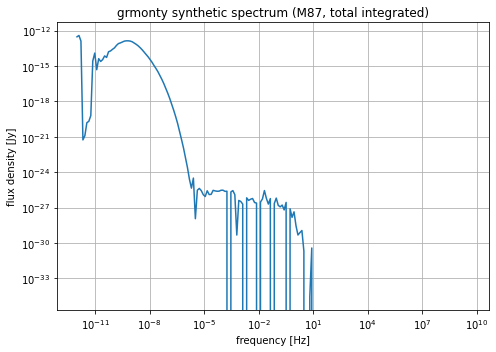

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

path = '/work/vmo703/igrmonty_outputs/spectrum_Sa-0.5_4000_RBETA_pos0_M1.0124e29.h5'
with h5py.File(path, 'r') as f:
    out = f['output']
    lognu = out['lnu'][:]       # shape (200,)
    nuLnu = out['nuLnu'][:]     # shape (8,200,18)

# choose component 0 = total luminosity (usually)
# sum over theta bins for full-sky integrated spectrum
nuLnu_total = np.sum(nuLnu[0, :, :], axis=-1)

# convert back to 1-D arrays
nu = 10**lognu
Lnu = nuLnu_total / nu  # erg/s/Hz

# convert to flux density (Jy) at D = 16.8 Mpc for M87
D = 16.8 * 3.086e24  # cm
Fnu = Lnu / (4 * np.pi * D**2) / 1e-23  # Jy

plt.figure(figsize=(7,5))
plt.loglog(nu, Fnu)
plt.xlabel('frequency [Hz]')
plt.ylabel('flux density [Jy]')
plt.title('grmonty synthetic spectrum (M87, total integrated)')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()


In [1]:
import h5py

# define your spectrum file path first
spec = "/work/vmo703/igrmonty_outputs/m87/spectrum_Sa-0.5_4000.h5"

# now inspect its params group
with h5py.File(spec, "r") as f:
    print("params in this grmonty file:\n")
    for k in f["/params"]:
        print(f"{k:<20} = {f['/params'][k][()]}")


params in this grmonty file:

BREMSSTRAHLUNG       = 1
B_unit               = 152.82424326107022
COMPTON              = 1
DIST_KAPPA           = 0
DLNU                 = 0.18420680743952364
GAMMACUT             = 1000.0
KAPPA                = 4.0
LNUMAX               = 55.262042231857095
LNUMIN               = 18.420680743952367
L_unit               = 960076745496757.0
MBH                  = 1.29285e+43
M_unit               = 1.83e+27
N1                   = 288
N2                   = 128
N3                   = 128
NUCUT                = 50000000000000.0
NUMAX                = 1e+24
NUMIN                = 100000000.0
N_EBINS              = 200
N_ESAMP              = 200
N_THBINS             = 18
Ne_unit              = 1235660.1724817962
Ns                   = 1000000
RHO_unit             = 2.067917640802869e-18
Rin                  = 1.6511440856012218
Rout                 = 1000.0
SYNCHROTRON          = 1
THETAE_MAX           = 1000.0
THETAE_MIN           = 0.3
TP_OVER_TE           = 3

AttributeError: 'tuple' object has no attribute 'encode'

| parameter     | value                                      | interpretation                                                                            |
| ------------- | ------------------------------------------ | ----------------------------------------------------------------------------------------- |
| **`L_unit`**  | `9.6×10¹⁴`                                 | **way too small!** normally this should be $\sim 10^{42}–10^{44}$ erg/s for M87-scale simulations.   |
| **`M_unit`**  | `1.83×10²⁷`                                | OK — that’s the same mass scale you’re inputting.                                         |
| **`nu_unit`** | **missing**                                | you can see it’s not listed at all — `grmonty` didn’t write `/params/nu_unit`.            |
| **error**     | `'tuple' object has no attribute 'encode'` | just means one parameter (the `dump` path) was stored as a tuple of bytes; harmless.      |


In [4]:
import h5py

# define your spectrum file path first
spec = "/work/vmo703/igrmonty_outputs/m87/spectrum_Sa-0.5_4000.h5"

# now inspect its params group
with h5py.File(spec, "r") as f:
    print("params in this grmonty file:\n")
    for k in f["/params"]:
        print(f"{k:<20} = {f['/params'][k][()]}")


params in this grmonty file:

BREMSSTRAHLUNG       = 1
B_unit               = 152.82424326107022
COMPTON              = 1
DIST_KAPPA           = 0
DLNU                 = 0.18420680743952364
GAMMACUT             = 1000.0
KAPPA                = 4.0
LNUMAX               = 55.262042231857095
LNUMIN               = 18.420680743952367
L_unit               = 960076745496757.0
MBH                  = 1.29285e+43
M_unit               = 1.83e+27
N1                   = 288
N2                   = 128
N3                   = 128
NUCUT                = 50000000000000.0
NUMAX                = 1e+24
NUMIN                = 100000000.0
N_EBINS              = 200
N_ESAMP              = 200
N_THBINS             = 18
Ne_unit              = 1235660.1724817962
Ns                   = 1000000
RHO_unit             = 2.067917640802869e-18
Rin                  = 1.6511440856012218
Rout                 = 1000.0
SYNCHROTRON          = 1
THETAE_MAX           = 1000.0
THETAE_MIN           = 0.3
TP_OVER_TE           = 3

AttributeError: 'tuple' object has no attribute 'encode'

```bash
./igrmonty/test_sane.sh
```
runs every SANE row in the CSV (all spins, all timesteps).

```bash
./igrmonty/test_mad.sh
```
does the same for MAD.

add dump indices after the command to restrict the sweep (e.g.):
```bash
./igrmonty/test_sane.sh 4000 4200
```

to run everything in one go, call
```bash
./igrmonty/run_spectra.sh ALL
```
(or pass SANE/MAD directly if you don’t need the wrappers). the script still honors any extra dump filters.

all output spectra are named spectrum_<state+spin>_<dump>_<model>_pos<pos>.h5, and detailed logs plus the generated .par files live under `igrmonty/logs/` for auditing.